In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from IPython.display import Image 
import io
import pydotplus
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("diabetes_data_upload.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
def convert_yes_no(txt):
    if 'Yes' in txt:
        return 1
    elif 'Positive' in txt:
        return 1
    elif 'Female' in txt:
        return 1
    else:
        return 0

In [ ]:
data['Gender'] = data['Gender'].apply(convert_yes_no)
data['Polyuria'] = data['Polyuria'].apply(convert_yes_no)
data['Polydipsia'] = data['Polydipsia'].apply(convert_yes_no)
data['sudden weight loss'] = data['sudden weight loss'].apply(convert_yes_no)
data['weakness'] = data['weakness'].apply(convert_yes_no)
data['Polyphagia'] = data['Polyphagia'].apply(convert_yes_no)
data['Genital thrush'] = data['Genital thrush'].apply(convert_yes_no)
data['visual blurring'] = data['visual blurring'].apply(convert_yes_no)
data['Itching'] = data['Itching'].apply(convert_yes_no)
data['Irritability'] = data['Irritability'].apply(convert_yes_no)
data['delayed healing'] = data['delayed healing'].apply(convert_yes_no)
data['partial paresis'] = data['partial paresis'].apply(convert_yes_no)
data['muscle stiffness'] = data['muscle stiffness'].apply(convert_yes_no)
data['Alopecia'] = data['Alopecia'].apply(convert_yes_no)
data['Obesity'] = data['Obesity'].apply(convert_yes_no)
data['class'] = data['class'].apply(convert_yes_no)


In [ ]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
features = data.columns
features = [x for x in features if x != 'class']
features

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [ ]:
X = data[features]
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
RF = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
RF = RF.fit(x_train, y_train)

In [ ]:
y_pred = RF.predict(x_test)

In [ ]:
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 1), "%" )

Accuracy using Random Forest Classifier:  98.1 %


Text(0, 0.5, 'Frequency')

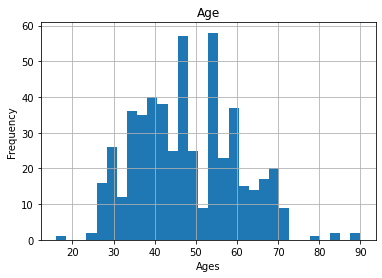

In [ ]:
data.hist(column = ['Age'], bins= 30)
plt.xlabel("Ages")
plt.ylabel("Frequency")

ValueError: ignored

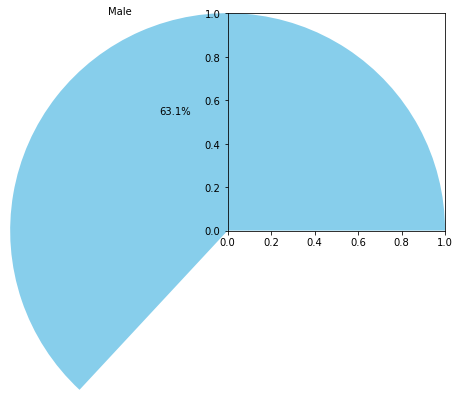

In [ ]:
df1 = pd.DataFrame(data['Gender'].value_counts().reset_index())

plt.pie(data=df1,x='Gender',labels='index',colors=['skyblue','blue'] ,autopct='%.1f%%')
plt.title("Gender")

Text(0.5, 1.0, 'Class')

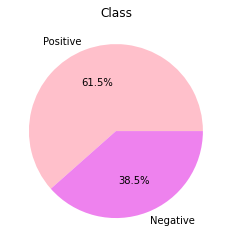

In [ ]:
df1 = pd.DataFrame(data['class'].value_counts().reset_index())

plt.pie(data=df1,x='class',labels='index',colors=['pink','violet'] ,autopct='%.1f%%')
plt.title("Class")

In [ ]:
df.boxplot(column=['Age','Gender'])